In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'mcu_box_office.csv')

In [3]:
data

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


In [23]:
data.shape

(27, 10)

**Number of movies in each phase**

In [24]:
data.groupby('mcu_phase')['mcu_phase'].count()

mcu_phase
1     6
2     6
3    11
4     4
Name: mcu_phase, dtype: int64

**Average rotten tomatoes score for each phase**

In [29]:
data.groupby('mcu_phase')['tomato_meter'].mean()

mcu_phase
1    80.000000
2    81.000000
3    89.090909
4    77.500000
Name: tomato_meter, dtype: float64

**The movie with highest audience score**

In [31]:
highest_score=data['audience_score'].max()
data[data['audience_score']==highest_score][['movie_title','audience_score']]

,movie_title,audience_score
24,Shang-Chi and the Legend of the Ten Rings,98
26,Spider-Man: No Way Home,98


**Average movie duration**

In [33]:
data['movie_duration'].mean()

np.float64(131.92592592592592)

**Whice year had the most MCU movie releases?**

In [38]:
def extract_year(date):
    year=""
    for i in date[::-1]:
        if i =='/':
            break
        year+=i
    return int(year[::-1])

In [61]:
data['year']=data['release_date'].apply(extract_year)
movies_per_year=data.groupby('year')['year'].count()
movies_per_year

year
2008    2
2010    1
2011    2
2012    1
2013    2
2014    2
2015    2
2016    2
2017    3
2018    3
2019    3
2021    4
Name: year, dtype: int64

**Average production budget**

In [14]:
data['production_budget']=data['production_budget'].str.replace(',',"").astype(int)


In [71]:
data['production_budget'].mean()

np.float64(195500000.0)

**The movie with the highest worldwide box office collection**

In [15]:
data['worldwide_box_office']=data['worldwide_box_office'].str.replace(',','').astype(int)
data[data['worldwide_box_office']==data['worldwide_box_office'].max()][['movie_title','audience_score','release_date','worldwide_box_office']]

,movie_title,audience_score,release_date,worldwide_box_office
21,Avengers: End Game,90,4/26/2019,2797800564


**Numbers of movies which have audience scores higher than 90%**

In [25]:
data[data['audience_score']>90]['audience_score'].count()

np.int64(9)

**correlation between production budget and worldwide box office?**

In [30]:
data[['production_budget','worldwide_box_office']]

,production_budget,worldwide_box_office
0,186000000,585171547
1,137500000,265573859
2,170000000,621156389
3,150000000,449326618
4,140000000,370569776
5,225000000,1515100211
6,200000000,1215392272
7,150000000,644602516
8,170000000,714401889
9,170000000,770882395


In [59]:
data['production_budget'].corr(data['worldwide_box_office']).round(decimals=4)

np.float64(0.795)

In [7]:
#plot the relationship:

plt.figure(figsize=(10,25))
plt.scatter(data['production_budget'].sort_index(),data['worldwide_box_office'],color='blue',edgecolors='black')
plt.title('Production budget vs. Worldwide box office')
plt.xlabel('Production budget($ Million)')
plt.ylabel('Worldwide box office($Million)')
for i,(x,y) in enumerate(zip(data['production_budget'],data['worldwide_box_office'])):
    plt.text(x,y,str(i),color='black',fontsize=10,ha='left')
plt.grid(True)
plt.show()

**Do longer movie tends to have higher audience scores?**

In [6]:
data.sort_values(by='movie_duration',ascending=False)[['movie_title','movie_duration','audience_score']]

,movie_title,movie_duration,audience_score
21,Avengers: End Game,181,90
25,Eternals,157,78
18,Avengers: Infinity War,149,91
26,Spider-Man: No Way Home,148,98
12,Captain America: Civil War,146,89
5,The Avengers,143,91
10,Avengers: Age of Ultron,141,83
14,Guardians of the Galaxy Vol. 2,135,87
8,Captain America: The Winter Soldier,135,92
17,Black Panther,134,79


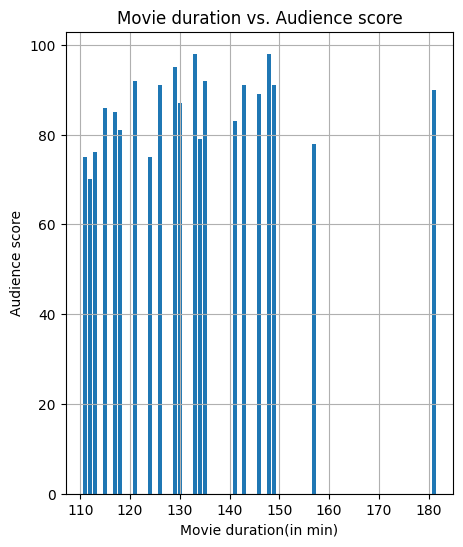

In [13]:
plt.figure(figsize=(5,6))
plt.bar(data['movie_duration'],data['audience_score'])
plt.title('Movie duration vs. Audience score')
plt.xlabel('Movie duration(in min)')
plt.ylabel('Audience score')
plt.grid(True)
plt.show()